Importing Required Modules


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

Importing Data 

In [2]:
data = pd.read_csv(r"E:\Projects\Waiter Tips Prediction\tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Target:

1.The Total Bill Paid

2.Number of People at a table

3.The day of the week

In [3]:
# Total_Bill vs tip column with respect to days

figure = px.scatter(data_frame=data,x="total_bill",y="tip",size="size",color="day",trendline="ols")
figure.show()
print(data['day'].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


In [4]:
# most days tip given to weiter
figure = px.pie(data,names='day',hole=0.5,values='tip')
figure.show()
print(data['day'].value_counts())
""" 
We can conclude that :
        First Highest Day of Tip giving is on Saturday 
        Second Highest Day of Tip giving is on Sunday
        Third Highest Day of Tip giving is on Thursday
         
"""

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


' \nWe can conclude that :\n        First Highest Day of Tip giving is on Saturday \n        Second Highest Day of Tip giving is on Sunday\n        Third Highest Day of Tip giving is on Thursday\n\n'

In [5]:
# Consider total_bill vs tips respect to sex

figure = px.scatter(data_frame=data,color="sex",x="total_bill",y="tip",trendline="ols",size="size")
figure.show()
print(data['sex'].value_counts())

""" 
    Conclusion :
                Male are the more on giving Side
"""

sex
Male      157
Female     87
Name: count, dtype: int64


' \n    Conclusion :\n                Male are the more on giving Side\n'

In [6]:
figure = px.pie(data,names='sex',values='tip',hole=0.5)
figure.show()

In [7]:
# considering total_bills vs tips with respect to time
figure = px.scatter(data_frame=data,x="total_bill",y="tip",size="size",color="time",trendline="ols")
figure.show()
print(data['time'].value_counts())
"""
    from the above graph we can conclude that 
    waiters are given more tip at Dinner Time 
"""

time
Dinner    176
Lunch      68
Name: count, dtype: int64


'\n    from the above graph we can conclude that \n    waiters are given more tip at Dinner Time \n'

In [8]:
figure = px.pie(data,names='time',values='tip',hole=0.5)
figure.show()

In [9]:
figure = px.pie(data,values="tip",names="smoker",hole=0.5)
figure.show()
print(data['smoker'].value_counts())
""" 
        Conclusion:
                Non-Smoker give more tip then smoker people
"""

smoker
No     151
Yes     93
Name: count, dtype: int64


' \n        Conclusion:\n                Non-Smoker give more tip then smoker people\n'

Waiter Tips Prediction Model


1.Mapping Data

In [10]:
# Helpfull to check Unique values in respected columns
print(data['sex'].unique())
print(data['day'].unique())
print(data['smoker'].unique())
print(data['time'].unique())

['Female' 'Male']
['Sun' 'Sat' 'Thur' 'Fri']
['No' 'Yes']
['Dinner' 'Lunch']


In [11]:
data['sex'] = data['sex'].map({"Female":0,"Male":1})
data['smoker'] = data['smoker'].map({"No":0,"Yes":1})
data['time'] = data['time'].map({"Dinner":1,"Lunch":0})
data['day'] = data['day'].map({"Thur":0,"Fri":1,"Sat":2,"Sun":3})

<Axes: >

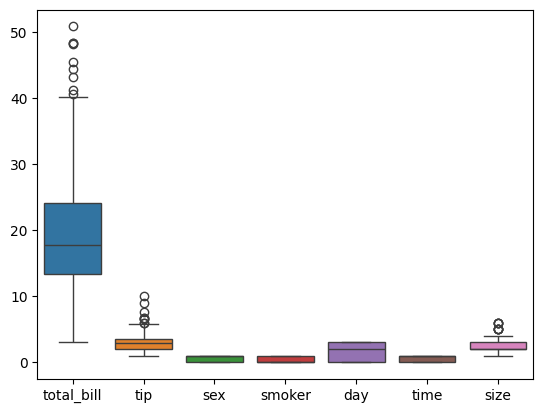

In [12]:
sns.boxplot(data)

2.Train Data 

In [13]:
X = data.drop(columns=["tip"],axis=1)
y = data['tip']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
models_temp = {
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "XGboost" : XGBRegressor(),
    "ridge_regression" : Ridge(),
    "Lasso":Lasso()
    
}

In [15]:
for i in range(len(list(models_temp))):
    model = list(models_temp.values())[i]

    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2_score = r2_score(y_train,y_train_pred)
    test_r2_score = r2_score(y_test,y_test_pred)

    print(model)
    print(f"Training R2_Score : {train_r2_score:.4f}")
    print(f"Testing R2_Score : {test_r2_score:.4f}")
    print("=========================================================")



""" 
    from this analysis we can conclude that LassoRegression Performs the Best 
"""

RandomForestRegressor()
Training R2_Score : 0.9137
Testing R2_Score : 0.2030
LinearRegression()
Training R2_Score : 0.4565
Testing R2_Score : 0.4429
AdaBoostRegressor()
Training R2_Score : 0.6166
Testing R2_Score : 0.3976
KNeighborsRegressor()
Training R2_Score : 0.5336
Testing R2_Score : 0.3110
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
        

' \n    from this analysis we can conclude that LassoRegression Performs the Best \n'

In [16]:
best_model = Lasso()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
print(r2_score(y_test,y_pred))

0.5467115210170849
